In [26]:
#Common libraries
import sys
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Libraries for Machine Learning
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [28]:
#uploading the data and labeling it
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

names = ['age', 'sex', 'cp', ' trestbps', 'chol', "fbs", "restecg", "thalach", "exang",
           "oldpeak", "slope", "ca" "thal", "class"
         ]
cleveland = pd.read_csv(url,names=names)

In [29]:
#Getting to know the data
cleveland.head()
cleveland.info()
cleveland.describe()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 303 entries, 63.0 to 38.0
Data columns (total 13 columns):
age          303 non-null float64
sex          303 non-null float64
cp           303 non-null float64
 trestbps    303 non-null float64
chol         303 non-null float64
fbs          303 non-null float64
restecg      303 non-null float64
thalach      303 non-null float64
exang        303 non-null float64
oldpeak      303 non-null float64
slope        303 non-null object
cathal       303 non-null object
class        303 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 33.1+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [30]:
#remove missing data(indicated with a "?")
data = cleveland[-cleveland.isin(['?'])]

In [31]:
#remove rows that can NaN values
data = data.dropna(axis = 0)

In [32]:
#converting features in to numeric data type
data.apply(pd.to_numeric)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cathal,class
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


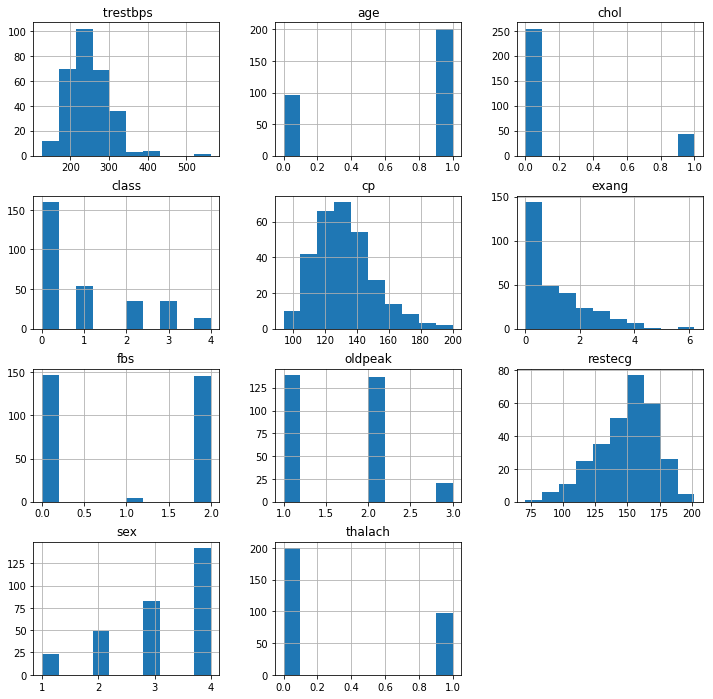

In [33]:
#plot histogram for each variable
data.hist(figsize = (12,12))
plt.show()

In [34]:
#create training/test split
X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [35]:
#converting features into categorical data types

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 25        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
#
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 2ms/step - loss: 1.5986 - acc: 0.5063
Epoch 2/100
237/237 [==============================] - 0s 192us/step - loss: 1.5187 - acc: 0.5021
Epoch 3/100
237/237 [==============================] - 0s 219us/step - loss: 1.4753 - acc: 0.5063
Epoch 4/100
237/237 [==============================] - 0s 170us/step - loss: 1.4529 - acc: 0.5105
Epoch 5/100
237/237 [==============================] - 0s 173us/step - loss: 1.4181 - acc: 0.5105
Epoch 6/100
237/237 [==============================] - 0s 182us/step - loss: 1.3942 - acc: 0.5105
Epoch 7/100
237/237 [==============================] - 0s 270us/step - loss: 1.3729 - acc: 0.5232
Epoch 8/100
237/237 [==============================] - 0s 184us/step - loss: 1.3472 - acc: 0.5148
Epoch 9/100
237/237 [==============================] - 0s 297us/step - loss: 1.3361 - acc: 0.5190
Epoch 10/100
237/237 [==============================] - 0s 222us/step - loss: 1.3089 - acc: 0.5274
Epoch 11/100
237/237 

237/237 [==============================] - 0s 188us/step - loss: 0.9496 - acc: 0.6160
Epoch 84/100
237/237 [==============================] - 0s 186us/step - loss: 0.9205 - acc: 0.6160
Epoch 85/100
237/237 [==============================] - 0s 211us/step - loss: 0.9341 - acc: 0.6076
Epoch 86/100
237/237 [==============================] - 0s 185us/step - loss: 0.9231 - acc: 0.6414
Epoch 87/100
237/237 [==============================] - 0s 192us/step - loss: 0.9178 - acc: 0.6203
Epoch 88/100
237/237 [==============================] - 0s 180us/step - loss: 0.9411 - acc: 0.6076
Epoch 89/100
237/237 [==============================] - 0s 264us/step - loss: 0.9284 - acc: 0.6118
Epoch 90/100
237/237 [==============================] - 0s 229us/step - loss: 0.9502 - acc: 0.6034
Epoch 91/100
237/237 [==============================] - 0s 211us/step - loss: 0.9500 - acc: 0.6118
Epoch 92/100
237/237 [==============================] - 0s 202us/step - loss: 0.9239 - acc: 0.6203
Epoch 93/100
237/237 [=

In [41]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print Y_train_binary[:20]

[1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0]


In [42]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

ValueError: Error when checking input: expected dense_14_input to have shape (13,) but got array with shape (12,)

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))